In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# <font color='red'>Backpropagation</font>


In this assignment, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code. 

## <font color='red'>Loading data </font>

In [3]:
file = r'/gdrive/MyDrive/Colab Notebooks/Datasets/Backpropagation/data.pkl'

with open(file, 'rb') as f:
    data = pickle.load(f)
    
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [4]:
#sigmoid

def sigmoid(z):
  sig = 1 / (1 + np.exp(-z))
  return sig

def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
  
grader_sigmoid(2)

True

In [5]:
def forward_propagation(x, y, w):

  #part_1
  val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
  part_1 = np.exp(val_1)

  #part_2
  part_2 = np.tanh(part_1 + w[6])

  #part_3
  part_3 = sigmoid((math.sin(w[2]*x[2]) * ((w[3]*x[3])+(w[4]*x[4]))) + w[7] )

  #Y_pred
  y_pred = part_2 + (part_3 * w[8])

  # compute derivative of L  w.r.to y' and store it in dy_pred
  dy_pred = -2 * (y - y_pred)

  #compute the value of L=(y-y')^2 and store it in variable loss
  loss = (y - y_pred)**2

  # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
  forward_dict={}

  forward_dict['exp']= part_1
  forward_dict['sigmoid'] = part_3
  forward_dict['tanh'] = part_2
  forward_dict['dy_pred'] = dy_pred
  forward_dict['loss'] = loss
  
  return forward_dict

In [6]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True

w=np.ones(9)*0.1

d1=forward_propagation(X[0],y[0],w)

grader_forwardprop(d1)

True

### <font color='red'>Task 1.2 </font>

    From above figure **Y_pred** can be written as 

      y_pred = Branch_1 + Branch_2

    where,

      - Branch_1 = tanh{[exp(((w1x1+w2x2)^2)+w5)]+w7}

      - Branch_2 = {sigmoid[(sin(w3x3)*((w4x4)+(w5x5)))+w8]} * w9 


    - w1, w2, w5, w7 belong to branch_1

    - w3, w4, w5, w8, w9 belong to branch_2

#### **Backward propagation**

In [7]:
def backward_propagation(x,w,dictt):

  data  = dictt

  #dl/dw9
  dw9 = data['dy_pred'] * data['sigmoid']

  #dl/dw8
  dw8 = data['dy_pred'] * (data['sigmoid'] *(1 - data['sigmoid']) * w[8])

  #dl/dw7
  dw7 = data['dy_pred'] * (1 - (data['tanh'])**2)

  #dl/dw6
  dw6 = data['dy_pred'] * (1 - (data['tanh'])**2) * data['exp']

  #dl/dw5
  dw5 = data['dy_pred'] * (data['sigmoid'] * (1 - data['sigmoid']) * w[8]) * (math.sin(x[2]*w[2])*x[4])

  #dl/dw4
  dw4 = data['dy_pred'] * (data['sigmoid'] * (1 - data['sigmoid']) * w[8]) * (math.sin(x[2]*w[2])*x[3])

  #dl/dw3
  dw3 = data['dy_pred'] * (data['sigmoid'] * (1 - data['sigmoid']) * w[8]) * ((x[3]*w[3]+x[4]*w[4]) * (math.cos(w[2]*x[2])*x[2]))

  #dl/dw2
  dw2 = data['dy_pred'] * (1 - (data['tanh'])**2) * data['exp'] * (2*x[1] * ((w[0]*x[0])+(w[1]*x[1])))

  #dl/dw1
  dw1 = data['dy_pred'] * (1 - (data['tanh'])**2) * data['exp'] * (2*x[0] * ((w[0]*x[0])+(w[1]*x[1])))

  #Storing derivative values in dictionary
  backward_dict={}

  backward_dict['dw1']=dw1 
  backward_dict['dw2']=dw2
  backward_dict['dw3']=dw3
  backward_dict['dw4']=dw4
  backward_dict['dw5']=dw5
  backward_dict['dw6']=dw6
  backward_dict['dw7']=dw7
  backward_dict['dw8']=dw8
  backward_dict['dw9']=dw9

  return backward_dict

In [8]:
def grader_backprop(data):

    dw1=(np.round(data['dw1'],4)==-0.2297)
    dw2=(np.round(data['dw2'],4)==-0.0214)
    dw3=(np.round(data['dw3'],4)==-0.0056)
    dw4=(np.round(data['dw4'],4)==-0.0047)
    dw5=(np.round(data['dw5'],4)==-0.001)
    dw6=(np.round(data['dw6'],4)==-0.6335)
    dw7=(np.round(data['dw7'],4)==-0.5619)
    dw8=(np.round(data['dw8'],4)==-0.0481)
    dw9=(np.round(data['dw9'],4)==-1.0181)
    # print(dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 

w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

# <font color='red'>Task 1.3 </font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

## <font color='red'> Implement Gradient checking </font> <br>


Algorithm =

  1. Calculate orignal gradients Backward propagation for given weights.
  2. Calculate loss values using

      $loss1 = forwardpropagation(orignal weights + eps) $
      
      $loss2 = forwardpropagation(orignal weights - eps)$ 

   functions.

  3. Calculate approx gradients using = $(loss_1 - loss_2)/(2*eps)$


  4. Calculate Gradient 
   gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

In [9]:
def gradient_checking(x,y,w,eps):

    #calculating Loss using forward propa
    L = forward_propagation(x,y,w)

    #using this loss for bbackward propagation to calculate 9_dw
    backward_dict=backward_propagation(x,w,L)

    # orignal 9_dw values
    original_gradients_list=list(backward_dict.values())
    
    approx_gradients = []
    #iterating
    for i in range(len(w)):

      #adding a small value to ith weight wi and calculatting Loss
      w[i] = w[i] + eps
      l1 = forward_propagation(x,y,w)
      loss1=l1['loss']

      #substracting a small value to ith weight wi and calculating Loss
      w[i] = w[i] - 2*eps    # subtracting 2*epsilon(already one epsilon is added) from each wi
      l2 = forward_propagation(x,y,w)
      loss2=l2['loss']

      #approximate gradient values using error eps
      aprrox_gradient = (loss1 - loss2) / (2*eps)
      approx_gradients.append(aprrox_gradient)

    #performing gradient check operation with orignal grad values calculated using Backward_propa
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients)
    gradient_check_value =(original_gradients_list-approx_gradients)/(original_gradients_list+approx_gradients)
    
    return gradient_check_value

In [10]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[-1.73921918e-08  1.28741906e-05 -2.55164399e-04 -1.05871856e-05
 -1.95446016e-04 -1.16536595e-10 -9.63625495e-08 -1.06774472e-07
 -1.43339489e-08]


True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Algorithm**

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [11]:
# weight initialization

epochs = 100
w =np.random.normal(0, 0.01, 9)
eta = 0.001
vanilla_loss = []

for epoch in tqdm(range(epochs)):
 
  for i in range(X.shape[0]):

    #pre_data
    f_dict = forward_propagation(X[i],y[i],w)

    #Getting derivatives of 9_dw wrt current weights
    dw_dict = backward_propagation(X[i],w,f_dict)

    #updating weights
    w[0] = w[0] - (eta * dw_dict['dw1'])
    w[1] = w[1] - (eta * dw_dict['dw2'])
    w[2] = w[2] - (eta * dw_dict['dw3'])
    w[3] = w[3] - (eta * dw_dict['dw4'])
    w[4] = w[4] - (eta * dw_dict['dw5'])
    w[5] = w[5] - (eta * dw_dict['dw6'])
    w[6] = w[6] - (eta * dw_dict['dw7'])
    w[7] = w[7] - (eta * dw_dict['dw8'])
    w[8] = w[8] - (eta * dw_dict['dw9'])
  
  vanilla_loss.append(f_dict['loss'])


100%|██████████| 100/100 [00:02<00:00, 37.51it/s]


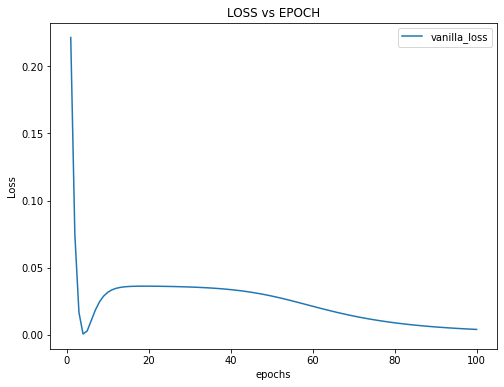

In [12]:
plt.figure(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('LOSS vs EPOCH')
plt.plot(range(1,epochs+1),vanilla_loss)
plt.legend(['vanilla_loss'])
plt.show()

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

In [13]:
#weight_initialization
w =np.random.normal(0, 0.01, 9)
epochs = 100
gamma = 0.3
eta = 0.001
momentum_loss = []

v_t = 0
for epoch in tqdm(range(epochs)):

  #Datapoint Loop
  for i in range(X.shape[0]):

    #Calling forward_propa for weights and Loss
    f_dict = forward_propagation(X[i],y[i],w)

    #Getting derivatives of 9_dw wrt current weights
    dw_dict = backward_propagation(X[i],w,f_dict)
    dw_list = list(dw_dict.values())
    
    #Weight_updation Loop
    for j in range(len(dw_list)):

      #calculating momentum
      v_t  = (gamma*v_t) + (eta*(dw_list[j]))
      w[j] = w[j] - v_t
  
  momentum_loss.append(f_dict['loss'])


100%|██████████| 100/100 [00:03<00:00, 26.26it/s]


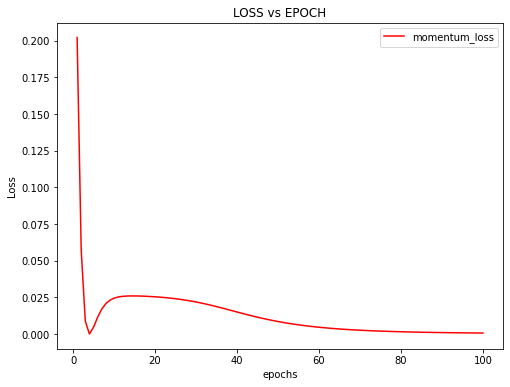

In [14]:
plt.figure(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('LOSS vs EPOCH')
plt.plot(range(1,epochs+1),momentum_loss,color='r')
plt.legend(['momentum_loss'])
plt.show()

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [15]:
beta_1 = 0.9
beta_2 = 0.99
eps = 1e-8
eta = 0.001 #learning_rate

w =np.random.normal(0, 0.01, 9)
epochs=100

adam_loss = []
epoch_list = []

m = 0
v = 0
for epoch in tqdm(range(epochs)):
  epoch_list.append(epoch+1)

  #Datapoint Loop
  for i in range(X.shape[0]):

    #Calling forward_propa for weights and Loss
    f_dict = forward_propagation(X[i],y[i],w)

    #Getting derivatives of 9_dw wrt current weights
    dw_dict = backward_propagation(X[i],w,f_dict)
    dw_list = list(dw_dict.values())

    #Weight updatation loop
    for j in range(len(dw_list)):

      # adaptive momentum
      m = (beta_1*m) + (1-beta_1)*dw_list[j]

      #adaptive learning rate
      v = (beta_2*v) + (1-beta_2)* dw_list[j]**2

      #correction
      corrected_m_t = m / (1 - beta_1**(epoch+1))
      corrected_v_t = v / (1 - beta_2**(epoch+1))

      #weight_updation
      w[j] = w[j] - ((eta * corrected_m_t) / (np.sqrt(corrected_v_t + eps)))

  #calculating Loss with updated weights
  adam_loss.append(f_dict['loss'])


100%|██████████| 100/100 [00:06<00:00, 15.35it/s]


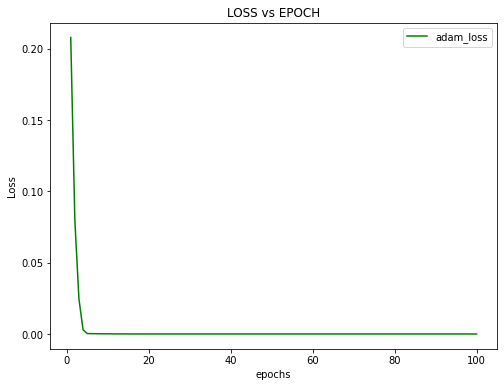

In [16]:
plt.figure(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('LOSS vs EPOCH')
plt.plot(epoch_list,adam_loss,color='g')
plt.legend(['adam_loss'])
plt.show()

# Comparision plot between epochs and loss with different optimizers

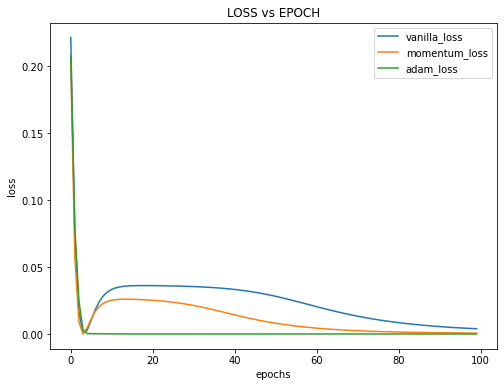

In [17]:
plt.figure(figsize=(8,6))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('LOSS vs EPOCH')
plt.plot(vanilla_loss)
plt.plot(momentum_loss)
plt.plot(adam_loss)
plt.legend(['vanilla_loss','momentum_loss','adam_loss'])
plt.show()

## **Conclusion**

  - ADAM SGD is coverging within 7 epochs. Rest all are taking about 70+ epochs.
   - ADAM is BEST in this case.